In [92]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from func_data import *
from datetime import datetime
from packaging import version

from tensorflow import keras
from keras import backend as K




rm ./logs/

In [93]:
df=pd.read_csv(r"creditcard.csv")

df.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [94]:
"""import pandas as pd

import pandas as pd

# Renaming the column
df.rename(columns={"Diabetes_012": "Diabetes"}, inplace=True)

# Dropping rows where Diabetes == 1
df.drop(df[df['Diabetes'] == 1].index, inplace=True)


# Creating a mapping dictionary
mapping = {
    0: 0,
    2: 1
}

# Using the mapping dictionary to replace values in the Diabetes column
df["Diabetes"] = df["Diabetes"].replace(mapping)

df.head(-10)"""

'import pandas as pd\n\nimport pandas as pd\n\n# Renaming the column\ndf.rename(columns={"Diabetes_012": "Diabetes"}, inplace=True)\n\n# Dropping rows where Diabetes == 1\ndf.drop(df[df[\'Diabetes\'] == 1].index, inplace=True)\n\n\n# Creating a mapping dictionary\nmapping = {\n    0: 0,\n    2: 1\n}\n\n# Using the mapping dictionary to replace values in the Diabetes column\ndf["Diabetes"] = df["Diabetes"].replace(mapping)\n\ndf.head(-10)'

In [95]:
print(df.shape)


(284807, 31)


In [96]:
#df = df.sample(n=200000)

In [97]:
neg, pos = np.bincount(df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))


Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



In [98]:
df=one_hot_encode_dataframe(df)

In [99]:
train_df, test_df = train_test_split(df, test_size=0.15,random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.15,random_state=42)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))


train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)


In [100]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)




print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (205772,)
Validation labels shape: (36313,)
Test labels shape: (42722,)
Training features shape: (205772, 30)
Validation features shape: (36313, 30)
Test features shape: (42722, 30)


In [101]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model_baseline(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          64, activation='relu',
          input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.2),
      keras.layers.Dense(
          64, activation='relu',
          ),
          keras.layers.Dropout(0.2),
          
           keras.layers.Dense(
          32, activation='relu',
          ),
           keras.layers.Dropout(0.2),
          
        
          
      
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=0.01),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [102]:
def make_model_oversample(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          128, activation='relu',
          kernel_regularizer='l2',
          input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.1),
      keras.layers.Dense(
          64, activation='relu',
          kernel_regularizer='l2',
          ),
          keras.layers.Dropout(0.1),
           keras.layers.Dense(
          32, activation='relu',
          kernel_regularizer='l2',
          ),
           keras.layers.Dropout(0.1),
          
        
          
      
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=0.01),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [103]:
EPOCHS = 150
BATCH_SIZE = 512



early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    verbose=1,
    patience=20,
    restore_best_weights=True)


In [104]:
model = make_model_baseline()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                1984      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                

In [105]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_features, val_labels),
    callbacks=[early_stopping,tensorboard_callback], 
    verbose=1)

Epoch 1/150
402/402 [==============================] - 2s 3ms/step - loss: 0.0138 - tp: 231.0000 - fp: 887.0000 - tn: 204518.0000 - fn: 136.0000 - accuracy: 0.9950 - precision: 0.2066 - recall: 0.6294 - auc: 0.9003 - prc: 0.3024 - val_loss: 0.0043 - val_tp: 37.0000 - val_fp: 11.0000 - val_tn: 36251.0000 - val_fn: 14.0000 - val_accuracy: 0.9993 - val_precision: 0.7708 - val_recall: 0.7255 - val_auc: 0.9208 - val_prc: 0.6662
Epoch 2/150
402/402 [==============================] - 1s 3ms/step - loss: 0.0044 - tp: 279.0000 - fp: 53.0000 - tn: 205352.0000 - fn: 88.0000 - accuracy: 0.9993 - precision: 0.8404 - recall: 0.7602 - auc: 0.9386 - prc: 0.7417 - val_loss: 0.0043 - val_tp: 37.0000 - val_fp: 11.0000 - val_tn: 36251.0000 - val_fn: 14.0000 - val_accuracy: 0.9993 - val_precision: 0.7708 - val_recall: 0.7255 - val_auc: 0.9377 - val_prc: 0.6671
Epoch 3/150
402/402 [==============================] - 1s 3ms/step - loss: 0.0038 - tp: 286.0000 - fp: 53.0000 - tn: 205352.0000 - fn: 81.0000 - acc

In [106]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)


84/84 [==============================] - 0s 724us/step


In [107]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

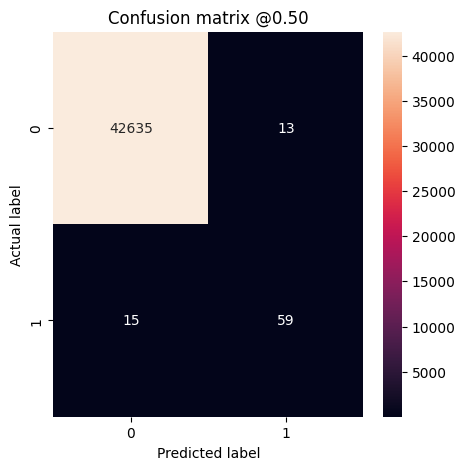

In [108]:

plot_cm(test_labels, test_predictions_baseline)

In [160]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import NearMiss

#sampling=RandomOverSampler(random_state=42,sampling_strategy=0.9)
#sampling=KMeansSMOTE(sampling_strategy=0.9,random_state=42,n_jobs=-1,k_neighbors=4,cluster_balance_threshold=0.001)
#sampling=SMOTE(sampling_strategy=0.9,random_state=42)
#sampling=ADASYN(sampling_strategy=0.9,random_state=42,n_neighbors=4,n_jobs=-1)
#under=EditedNearestNeighbours(n_neighbors=3,kind_sel='all')
#under=RandomUnderSampler(sampling_strategy=1)
under = (NearMiss(sampling_strategy=1,version=3,n_jobs=-1))


sampling_name="Near Miss - 3"



resampled_train_features,resampled_train_labels=under.fit_resample(train_features,train_labels)



val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2)





c:\Users\karol\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


In [161]:
print(resampled_train_features.shape)
print(resampled_train_labels.shape)

(658, 30)
(658,)


In [162]:
resampled_model=make_model_oversample()

logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")+sampling_name
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


resampled_history = resampled_model.fit(
    resampled_train_features,
    resampled_train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_features, val_labels),
    callbacks=[early_stopping,tensorboard_callback],  
    verbose=1)


Epoch 1/150
2/2 [==============================] - 1s 477ms/step - loss: 2.8725 - tp: 348.0000 - fp: 1422.0000 - tn: 41517.0000 - fn: 93.0000 - accuracy: 0.9651 - precision: 0.1966 - recall: 0.7891 - auc: 0.9439 - prc: 0.4019 - val_loss: 2.4170 - val_tp: 20.0000 - val_fp: 30587.0000 - val_tn: 5675.0000 - val_fn: 31.0000 - val_accuracy: 0.1568 - val_precision: 6.5345e-04 - val_recall: 0.3922 - val_auc: 0.2179 - val_prc: 8.0766e-04
Epoch 2/150
2/2 [==============================] - 0s 142ms/step - loss: 2.2685 - tp: 213.0000 - fp: 119.0000 - tn: 172.0000 - fn: 154.0000 - accuracy: 0.5851 - precision: 0.6416 - recall: 0.5804 - auc: 0.6308 - prc: 0.6906 - val_loss: 2.3885 - val_tp: 46.0000 - val_fp: 35032.0000 - val_tn: 1230.0000 - val_fn: 5.0000 - val_accuracy: 0.0351 - val_precision: 0.0013 - val_recall: 0.9020 - val_auc: 0.7962 - val_prc: 0.5505
Epoch 3/150
2/2 [==============================] - 0s 145ms/step - loss: 1.9612 - tp: 340.0000 - fp: 193.0000 - tn: 98.0000 - fn: 27.0000 - acc

In [163]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)

84/84 [==============================] - 0s 816us/step


Near Miss - 3
loss :  0.25038716197013855
tp :  60.0
fp :  1175.0
tn :  41473.0
fn :  14.0
accuracy :  0.9721689224243164
precision :  0.04858299717307091
recall :  0.8108108043670654
auc :  0.9551900029182434
prc :  0.3363785445690155



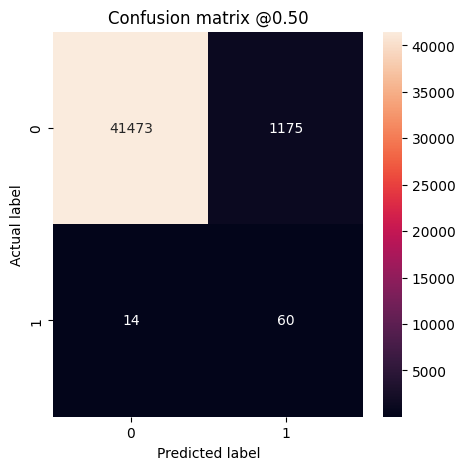

In [164]:
print(sampling_name)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

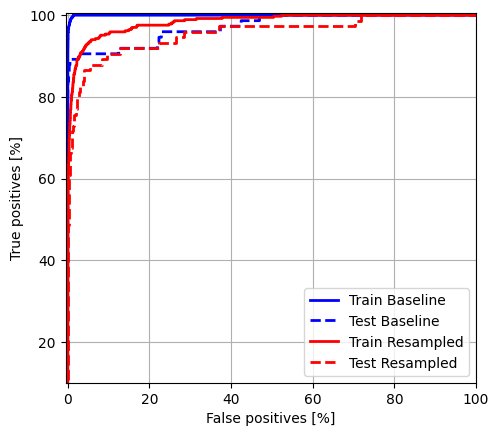

In [165]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100])
  plt.ylim([10,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

colors=['b','r']

plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')


plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[1])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[1], linestyle='--')
plt.legend(loc='lower right');


In [166]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

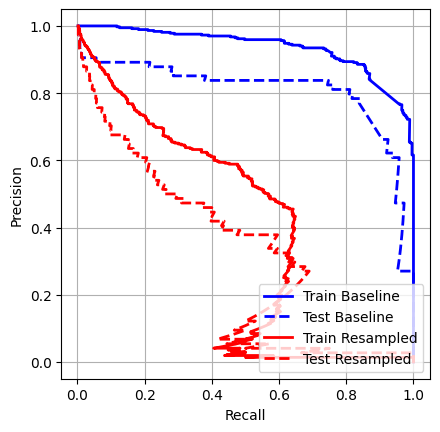

In [167]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')


plot_prc("Train Resampled", train_labels, train_predictions_resampled, color=colors[1])
plot_prc("Test Resampled", test_labels, test_predictions_resampled, color=colors[1], linestyle='--')
plt.legend(loc='lower right');
